In [2]:
import MeCab
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
data_tweet = pd.read_csv('data/tweets.tsv', sep="\t")
data_tweet = data_tweet.dropna()
y = data_tweet.iloc[:, 1].values

tagger = MeCab.Tagger()
tagger.parse('')

def word_tokenize(texts):
    node = tagger.parseToNode(texts)
    word_list = []
    while node:
        word_type = node.feature.split(",")[0]
        if (word_type == '名詞')|(word_type == '形容詞'):
            word = node.feature.split(",")[6]
            if word != '*':
                word_list.append(word)
        node = node.next
    return word_list

vectorizer = TfidfVectorizer(tokenizer=word_tokenize)
tweet_matrix = vectorizer.fit_transform(data_tweet.iloc[:,0])
X = tweet_matrix.toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9226519337016574


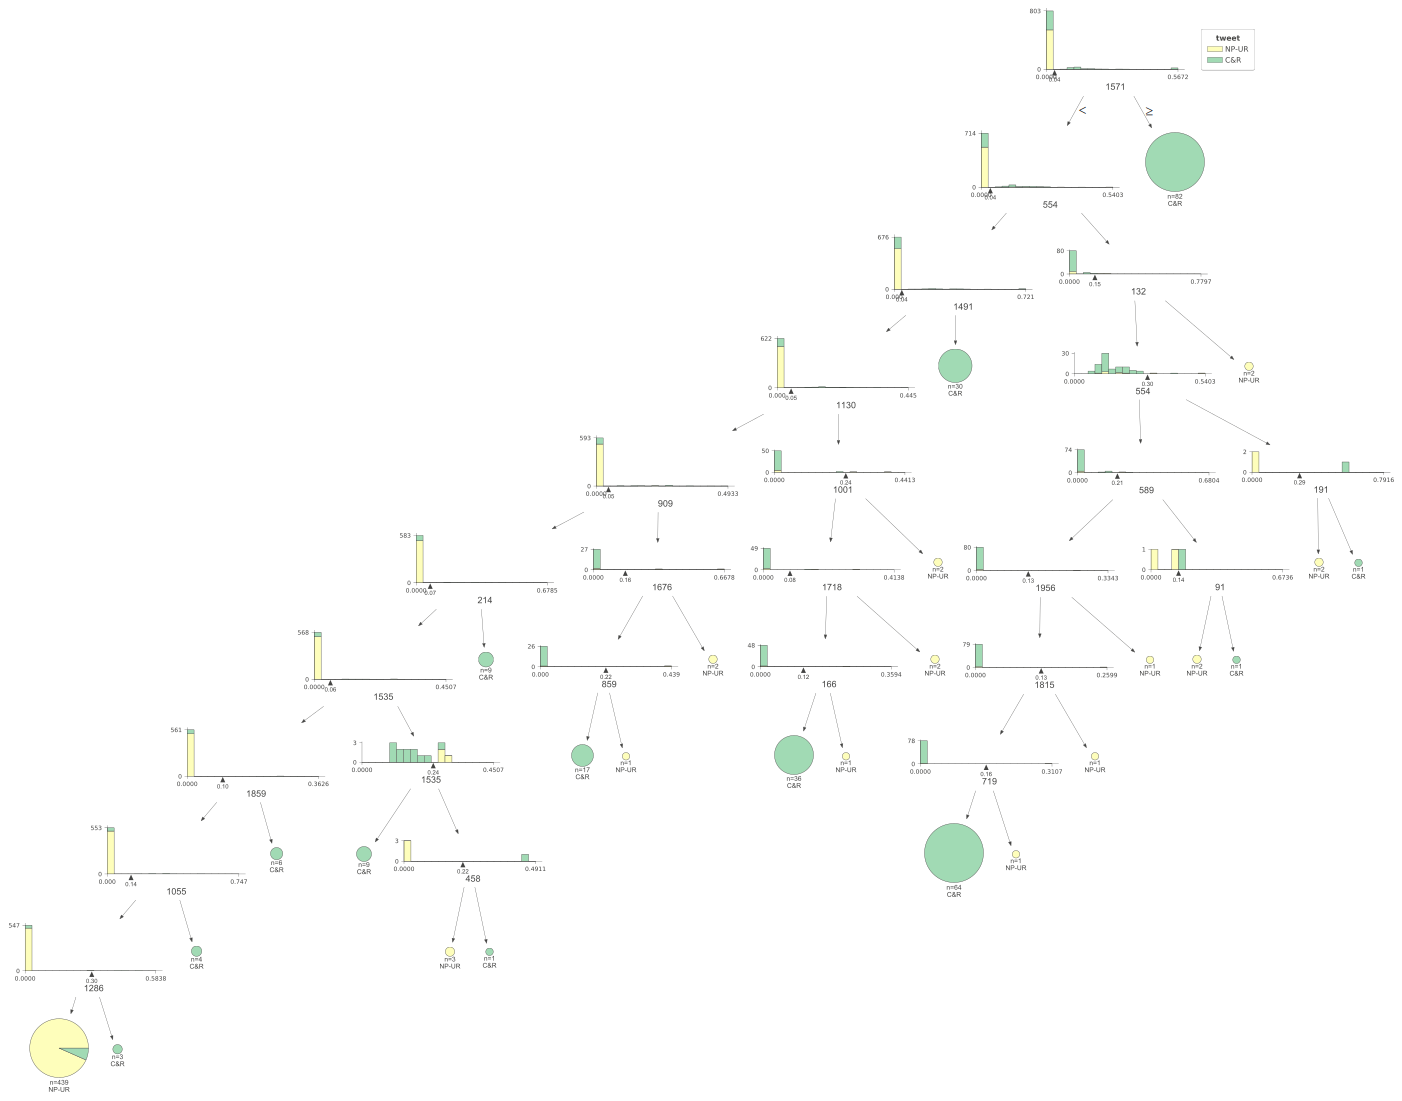

In [6]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(clf, X, y,
    feature_names=[i for i in range(X.shape[1])],
    target_name='tweet',
    class_names=['NP-UR', 'C&R']
)
display(viz)

In [8]:
words_list = vectorizer.get_feature_names()
print(words_list[1606])
print(words_list[1524])

立ち読み
画面
